### 2025/11/12 [Lesson 28](https://www.bilibili.com/list/1163352997/?sid=482825&spm_id_from=333.1387.0.0&oid=562863323&bvid=BV1fv4y117nn&desc=0)
内容:  
- 区间估计的思维过程

---

### 区间估计的基本思路

在**点估计**中，我们给参数 $\theta$ 一个“单点”估计值（例如 $\hat\theta$）。  
在**区间估计**中，我们不给出一个点，而是给出一个**区间**：
$$
[L(X_1,\dots,X_n),\; U(X_1,\dots,X_n)]
$$
希望这个区间“有较大概率”把真正的参数 $\theta$ 包含在里面。  
这个区间就叫做 **置信区间**（confidence interval）。

---

### 1. 置信区间与置信水平

设参数为 $\theta$，由样本构造区间：
$$
\big[L(X_1,\dots,X_n),\;U(X_1,\dots,X_n)\big].
$$

如果对某个 $1-\alpha$（例如 $0.95$）有
$$
P_\theta\big( L(X_1,\dots,X_n) \le \theta \le U(X_1,\dots,X_n) \big)
= 1-\alpha,
$$
则称这个区间是 $\theta$ 的一个**置信水平为 $1-\alpha$ 的置信区间**。

- $1-\alpha$：**置信水平**（confidence level），或“置信度”，常取 $0.90, 0.95, 0.99$。  
- $\alpha$：犯错的概率（区间没有覆盖真 $\theta$ 的概率），也叫显著性水平。

直观理解：

> 不是说“某个已经算出来的具体区间有 $1-\alpha$ 的概率包含 $\theta$”，  
> 而是说“按这种构造方法，**反复抽样、反复构造区间**，其中大约有 $1-\alpha$ 的比例会把真 $\theta$ 包含在内”。

---

### 2. 区间估计的一般构造方法（统计量 + 分界点）

区间估计一般分三步：

1. **选一个合适的统计量**  
   例如：
   - 已知方差时，用
     $$
     Z = \frac{\bar X - \mu}{\sigma/\sqrt{n}}
     $$
   - 未知方差时，用
     $$
     T = \frac{\bar X - \mu}{S/\sqrt{n}}
     $$

2. **利用分布求出“分界点”（临界值）**  
   例如：
   - 对标准正态 $Z$：找 $z_{\alpha/2}$ 使得
     $$
     P(-z_{\alpha/2} \le Z \le z_{\alpha/2}) = 1-\alpha
     $$
   - 对 $t$ 分布：找 $t_{\alpha/2}(n-1)$ 使得
     $$
     P\big(-t_{\alpha/2}(n-1) \le T \le t_{\alpha/2}(n-1)\big) = 1-\alpha
     $$

3. **把不等式中的参数“解出来”**  
   例如对 $Z$ 的情况：
   $$
   P\left(
   -z_{\alpha/2}
   \le \frac{\bar X - \mu}{\sigma/\sqrt{n}}
   \le z_{\alpha/2}
   \right) = 1-\alpha
   $$
   两边同乘 $\sigma/\sqrt{n}$，再移项，得到
   $$
   P\left(
   \bar X - z_{\alpha/2}\frac{\sigma}{\sqrt{n}}
   \le \mu \le
   \bar X + z_{\alpha/2}\frac{\sigma}{\sqrt{n}}
   \right) = 1-\alpha.
   $$
   于是
   $$
   \left[
   \bar X - z_{\alpha/2}\frac{\sigma}{\sqrt{n}},\;
   \bar X + z_{\alpha/2}\frac{\sigma}{\sqrt{n}}
   \right]
   $$
   就是 $\mu$ 的一个 $1-\alpha$ 置信区间。

**总结一句话：**

> “用统计量的分布找到分界点，再把不等式反过来解出参数”的过程，就是区间估计。

---

### 3. 区间估计与点估计、假设检验的关系（简单记住）

- **点估计**：给出“中心位置”（如 $\bar X$）。  
- **区间估计**：在点估计的基础上，加上“误差范围”（如 $\pm$ 若干倍标准误）。  
- **假设检验**：很多检验可以通过“看假设给出的参数值是否落在置信区间内”来理解。

例如：  
- 若某个 $\mu_0$ 不在 $\mu$ 的 $95\%$ 置信区间内，则以显著性水平 $\alpha=0.05$ 拒绝 $H_0:\mu=\mu_0$。

---

### 4. 本章后续常见任务

在具体分布和条件下，我们将分别推导以下参数的置信区间公式，例如：

- 正态总体的均值 $\mu$（方差已知 / 未知）
- 正态总体的方差 $\sigma^2$
- 两个正态总体的均值差 $\mu_1-\mu_2$
- 两个方差之比 $\sigma_1^2 / \sigma_2^2$
- 伯努利分布参数 $p$ 等

每一种情况的套路都是：  
**选统计量 → 写出分布 → 找分界点 → 解不等式得到参数区间。**

---

### 分界点可视化-正态分布

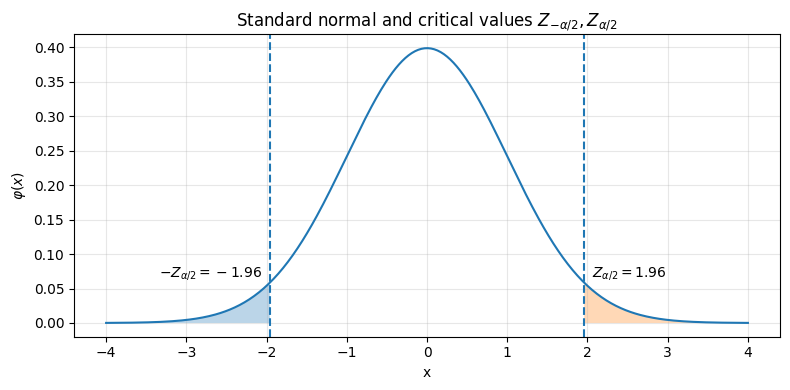

In [29]:
# Standard normal: visualize -Z_{α/2}, Z_{α/2}

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

alpha = 0.05

# left and right critical values
z_left = norm.ppf(alpha / 2)         # Z_{α/2}
z_right = norm.ppf(1 - alpha / 2)    # Z_{α/2}

x = np.linspace(-4, 4, 400)
y = norm.pdf(x)

plt.figure(figsize=(8, 4))
plt.plot(x, y)

# left tail
x_left = np.linspace(-4, z_left, 200)
plt.fill_between(x_left, norm.pdf(x_left), alpha=0.3)

# right tail
x_right = np.linspace(z_right, 4, 200)
plt.fill_between(x_right, norm.pdf(x_right), alpha=0.3)

plt.axvline(z_left, linestyle='--')
plt.axvline(z_right, linestyle='--')

plt.title(r'Standard normal and critical values $Z_{-\alpha/2}, Z_{\alpha/2}$')
plt.xlabel('x')
plt.ylabel(r'$\varphi(x)$')

plt.text(z_left-0.1, 0.06, rf'$-Z_{{\alpha/2}}={z_left:.2f}$', ha='right', va='bottom')
plt.text(z_right+0.1, 0.06, rf'$Z_{{\alpha/2}}={z_right:.2f}$', ha='left', va='bottom')

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 分界点可视化-卡方分布(n=5)

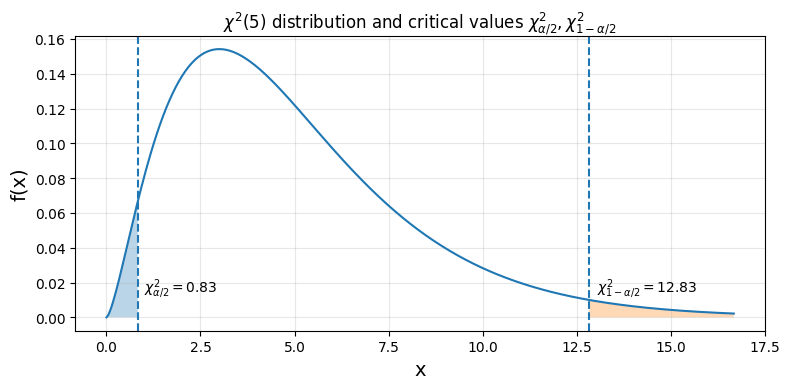

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

alpha = 0.05
df = 5  # degrees of freedom

# left/right bounds for two-sided CI (tail areas α/2 each)
chi2_left = chi2.ppf(alpha / 2, df)        # used for left tail shading
chi2_right = chi2.ppf(1 - alpha / 2, df)   # used for right tail shading

x = np.linspace(0.001, chi2_right * 1.3, 400)
y = chi2.pdf(x, df)

plt.figure(figsize=(8, 4))
plt.plot(x, y)

# left tail (area α/2)
x_left = np.linspace(0.001, chi2_left, 200)
plt.fill_between(x_left, chi2.pdf(x_left, df), alpha=0.3)

# right tail (area α/2)
x_right = np.linspace(chi2_right, x.max(), 200)
plt.fill_between(x_right, chi2.pdf(x_right, df), alpha=0.3)

plt.axvline(chi2_left, linestyle='--')
plt.axvline(chi2_right, linestyle='--')

plt.title(r'$\chi^2({%d})$ distribution and critical values $\chi^2_{\alpha/2}, \chi^2_{1-\alpha/2}$' % df)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)

plt.text(chi2_left+2.1, 0.01,  rf'$\chi^2_{{\alpha/2}}={chi2_left:.2f}$',  ha='right', va='bottom')
plt.text(chi2_right+0.2, 0.01, rf'$\chi^2_{{1-\alpha/2}}={chi2_right:.2f}$',   ha='left',  va='bottom')

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 练习题：正态总体均值的置信区间（方差未知）

> 已知总体 $X$ 服从正态分布 $N(\mu,\sigma^2)$，但 $\mu,\sigma^2$ 均未知。  
> 从该总体中抽取容量为 $n$ 的简单随机样本：
> $$
> X_1, X_2, \dots, X_n.
> $$
> 记样本均值和样本方差分别为
> $$
> \bar X = \frac{1}{n}\sum_{i=1}^n X_i,\qquad
> S^2 = \frac{1}{n-1}\sum_{i=1}^n (X_i - \bar X)^2.
> $$

1. **推导**：证明统计量
   $$
   T = \frac{\bar X - \mu}{S/\sqrt{n}}
   $$
   服从自由度为 $n-1$ 的 $t$ 分布，即
   $$
   T \sim t(n-1),
   $$
   并据此写出 $\mu$ 的一个置信水平为 $1-\alpha$ 的置信区间。

2. **应用**：在一次实际观测中，得到  
   - 样本容量 $n = 25$，  
   - 样本均值 $\bar x = 10.2$，  
   - 样本标准差 $s = 1.5$。  

   取显著性水平 $\alpha = 0.05$，  
   写出 $\mu$ 的 $95\%$ 置信区间（可以用符号 $t_{0.025}(24)$ 表示临界值，不必代入具体数值）。

### 解答

---

### 第 1 问：推导分布并给出一般形式的置信区间

已知：$X_1,\dots,X_n \sim N(\mu,\sigma^2)$，独立同分布。

1. 由正态总体的性质可知：
   - 样本均值
     $$
     \bar X \sim N\!\left(\mu,\ \frac{\sigma^2}{n}\right),
     $$
     因此
     $$
     Z = \frac{\bar X - \mu}{\sigma/\sqrt{n}} \sim N(0,1).
     $$
   - 样本方差满足
     $$
     \frac{(n-1)S^2}{\sigma^2} \sim \chi^2(n-1),
     $$
     且 $\bar X$ 与 $S^2$ 相互独立。

2. 定义
   $$
   T = \frac{\bar X - \mu}{S/\sqrt{n}}
     = \frac{\dfrac{\bar X - \mu}{\sigma/\sqrt{n}}}
            {\sqrt{\dfrac{(n-1)S^2}{(n-1)\sigma^2}}}
     = \frac{Z}{\sqrt{\,\dfrac{(n-1)S^2}{\sigma^2}/(n-1)\,}}.
   $$

   上式中：
   - 分子 $Z \sim N(0,1)$；
   - 分母里的
     $$
     \frac{(n-1)S^2}{\sigma^2} \sim \chi^2(n-1)
     $$
     且与 $Z$ 独立。

   因此按 $t$ 分布的定义，
   $$
   T \sim t(n-1).
   $$

---

#### 利用 $T \sim t(n-1)$ 构造 $\mu$ 的置信区间

对任意给定的 $\alpha \in (0,1)$，取 $t_{\alpha/2}(n-1)$ 使得
$$
P\big(-t_{\alpha/2}(n-1) \le T \le t_{\alpha/2}(n-1)\big) = 1-\alpha.
$$

把 $T = \dfrac{\bar X - \mu}{S/\sqrt{n}}$ 代入：
$$
P\left(
 -t_{\alpha/2}(n-1)
 \le \frac{\bar X - \mu}{S/\sqrt{n}}
 \le t_{\alpha/2}(n-1)
\right) = 1-\alpha.
$$

两边同乘 $S/\sqrt{n}$，并对 $\mu$ 进行移项：
$$
P\left(
 \bar X - t_{\alpha/2}(n-1)\frac{S}{\sqrt{n}}
 \le \mu \le
 \bar X + t_{\alpha/2}(n-1)\frac{S}{\sqrt{n}}
\right) = 1-\alpha.
$$

所以，$\mu$ 的一个置信水平为 $1-\alpha$ 的置信区间为
$$
\boxed{
\left[
 \bar X - t_{\alpha/2}(n-1)\frac{S}{\sqrt{n}},\ 
 \bar X + t_{\alpha/2}(n-1)\frac{S}{\sqrt{n}}
\right]}.
$$

---

### 第 2 问：代入具体样本数值

已知：
- $n = 25$；
- $\bar x = 10.2$；
- $s = 1.5$；
- $\alpha = 0.05$，置信水平为 $1-\alpha = 0.95$；
- 自由度 $n-1 = 24$，临界值记为 $t_{0.025}(24)$。

代入一般公式：
$$
\mu \text{ 的 } 95\% \text{ 置信区间 } =
\left[
 \bar x - t_{0.025}(24)\frac{s}{\sqrt{n}},\ 
 \bar x + t_{0.025}(24)\frac{s}{\sqrt{n}}
\right].
$$

这里
$$
\frac{s}{\sqrt{n}} = \frac{1.5}{\sqrt{25}} = \frac{1.5}{5} = 0.3,
$$
因此
$$
\mu \in
\left[
 10.2 - t_{0.025}(24)\cdot 0.3,\ 
 10.2 + t_{0.025}(24)\cdot 0.3
\right].
$$

若查表得 $t_{0.025}(24) \approx 2.064$，则近似为
$$
\mu \in
\left[
 10.2 - 2.064\times 0.3,\ 
 10.2 + 2.064\times 0.3
\right]
=
[\,10.2 - 0.62,\ 10.2 + 0.62\,]
\approx [9.58,\ 10.82].
$$
